In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

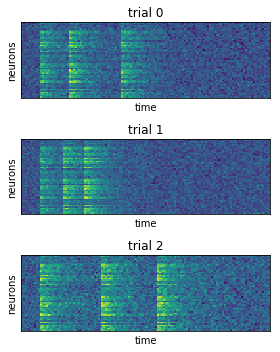

In [2]:
from twpca.datasets import jittered_population

pure_data = jittered_population(n_trial=50)[0]
data = pure_data + 0.1*np.random.randn(*pure_data.shape)
data = data

fig, axes = plt.subplots(3, 1, figsize=(4, 5))
for ax, trial in zip(axes, data):
    ax.imshow(trial.T, aspect='auto')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_ylabel('neurons')
    ax.set_xlabel('time')
for k, ax in enumerate(axes):
    ax.set_title('trial {}'.format(k))

fig.tight_layout()

In [3]:
from twpca import TWPCA

model = TWPCA(n_components=1, smoothness=1)
model.fit(data)
aligned_data = model.soft_transform(data) # aligns each trial to barycenter

Done after 5 iterations


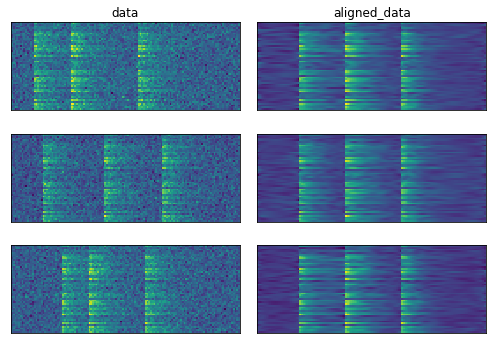

In [4]:
fig, axes = plt.subplots(3, 2, figsize=(7,5))
idx = np.random.permutation(data.shape[0])
for ax, raw_trial, atrial in zip(axes, data[idx], aligned_data[idx]):
    ax[0].imshow(raw_trial.T)
    ax[1].imshow(atrial.T)
    
for ax in axes.ravel():
    ax.set_xticks([])
    ax.set_yticks([])
    
axes[0,0].set_title('data')
axes[0,1].set_title('aligned_data')
fig.tight_layout()

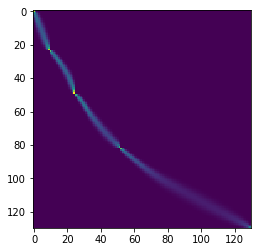

In [5]:
plt.imshow(model.soft_warps[0]) # soft warp for the first trial

Computing hard warps: 100%|██████████| 50/50 [00:13<00:00,  3.84it/s]


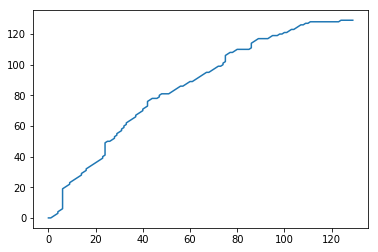

In [6]:
plt.plot(model.hard_warps[0][:,0], model.hard_warps[0][:,1]) # hard warp for the first trial